In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("FINAL-SMS-DATA.csv")
data.head()

,_protocol,_address,_date,_type,_subject,_body,_toa,_sc_toa,_service_center,_read,_status,_locked,_date_sent,_sub_id,_readable_date,_contact_name
0,0,AD-rajpol,1.700000e+12,1,NaN,Complaint No 279970242301096 registered at C...,NaN,NaN,9.200000e+11,1,-1,0,1.700000e+12,1.0,17-10-2023 18:34,(Unknown)
1,0,AX-rajpol,1.700000e+12,1,NaN,EO has been assigned on your Complaint(not FIR...,NaN,NaN,9.200000e+11,1,-1,0,1.700000e+12,1.0,18-10-2023 11:54,(Unknown)
2,0,9.19E+11,1.700000e+12,2,NaN,"I am Sankar Rao from Mumbai, and I have an ide...",NaN,NaN,NaN,1,-1,0,0.000000e+00,1.0,29-11-2023 02:55,(Unknown)
3,0,AD-AIRDOT,1.720000e+12,1,NaN,"Alert: On receiving any unwanted SMS , please ...",NaN,NaN,9.200000e+11,1,-1,0,1.720000e+12,3.0,01-06-2024 21:51,(Unknown)
4,0,AX-VBFOOD,1.720000e+12,1,NaN,CreditChangeCrDayCrLmt Join group to learn abo...,NaN,NaN,9.200000e+11,0,-1,0,1.720000e+12,1.0,04-06-2024 11:57,(Unknown)


In [3]:
data = data["_body"]

In [4]:
data.head()

0    Complaint No 279970242301096 registered  at  C...
1    EO has been assigned on your Complaint(not FIR...
2    I am Sankar Rao from Mumbai, and I have an ide...
3    Alert: On receiving any unwanted SMS , please ...
4    CreditChangeCrDayCrLmt Join group to learn abo...
Name: _body, dtype: object

# preprocessing

In [5]:
import nltk
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [6]:
def preprocessing(text):
    text = text.lower()
    text = word_tokenize(text)

    y = []
    for i in text:
        if i.isalpha():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [7]:
a = "Hello, how are you CHATGPT??? I am Blaze1301. The sky is blazing 274"
preprocessing(a)

'hello chatgpt sky blaze'

In [8]:
data = data.apply(preprocessing)

In [9]:
data = pd.DataFrame(data)
data

,_body
0,complaint regist chitrakoot download
1,eo assign complaint fir jaswant kumar rajastha...
2,sankar rao mumbai idea base millet encompass e...
3,alert receiv unwant sm pleas complain call sen...
4,creditchangecrdaycrlmt join group learn latest...
...,...
9806,miss superior indoor coverag airtel wifi call ...
9807,credit mob bk ref avl bal share bank india
9808,dear custom miss call last miss call thankyou ...
9809,miss biggest festiv offer upgrad entertain rs ...


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf = TfidfVectorizer()
cv = CountVectorizer(analyzer='word', ngram_range=(1,1))

In [11]:
data_transformed = tf.fit_transform(data['_body']).toarray()
data_transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
data_transformed.shape

(9811, 5890)

In [13]:
from sklearn.cluster import KMeans

In [14]:
km = KMeans(n_clusters=2)

In [15]:
km.fit(data_transformed) # without numbers

KMeans(n_clusters=2)

In [16]:
labels = km.labels_
labels

array([0, 0, 0, ..., 1, 0, 1])

In [17]:
data['label'] = labels
data

,_body,label
0,complaint regist chitrakoot download,0
1,eo assign complaint fir jaswant kumar rajastha...,0
2,sankar rao mumbai idea base millet encompass e...,0
3,alert receiv unwant sm pleas complain call sen...,0
4,creditchangecrdaycrlmt join group learn latest...,0
...,...,...
9806,miss superior indoor coverag airtel wifi call ...,1
9807,credit mob bk ref avl bal share bank india,0
9808,dear custom miss call last miss call thankyou ...,1
9809,miss biggest festiv offer upgrad entertain rs ...,0


In [18]:
data['label'].value_counts()

label
0    7986
1    1825
Name: count, dtype: int64

In [19]:
data_copy = data['_body']

In [20]:
ngram2 = cv.fit_transform(data_copy).toarray()

In [21]:
km.fit(ngram2)

KMeans(n_clusters=2)

In [22]:
labels2 = km.labels_

In [23]:
data['label2'] = labels2
data

,_body,label,label2
0,complaint regist chitrakoot download,0,1
1,eo assign complaint fir jaswant kumar rajastha...,0,1
2,sankar rao mumbai idea base millet encompass e...,0,1
3,alert receiv unwant sm pleas complain call sen...,0,1
4,creditchangecrdaycrlmt join group learn latest...,0,1
...,...,...,...
9806,miss superior indoor coverag airtel wifi call ...,1,1
9807,credit mob bk ref avl bal share bank india,0,1
9808,dear custom miss call last miss call thankyou ...,1,1
9809,miss biggest festiv offer upgrad entertain rs ...,0,1


In [24]:
 data[(data['label'] == 1) & (data['label2'] == 0)]

,_body,label,label2


In [25]:
spam_ham = data[['_body', 'label']]

In [26]:
spam_ham

,_body,label
0,complaint regist chitrakoot download,0
1,eo assign complaint fir jaswant kumar rajastha...,0
2,sankar rao mumbai idea base millet encompass e...,0
3,alert receiv unwant sm pleas complain call sen...,0
4,creditchangecrdaycrlmt join group learn latest...,0
...,...,...
9806,miss superior indoor coverag airtel wifi call ...,1
9807,credit mob bk ref avl bal share bank india,0
9808,dear custom miss call last miss call thankyou ...,1
9809,miss biggest festiv offer upgrad entertain rs ...,0


In [28]:
sh = spam_ham 

In [32]:
sh = sh.drop_duplicates(keep = 'first')

In [34]:
sh["label"].value_counts()

label
0    3905
1     355
Name: count, dtype: int64

In [35]:
# 1 is spam 
# 0 is not spam

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

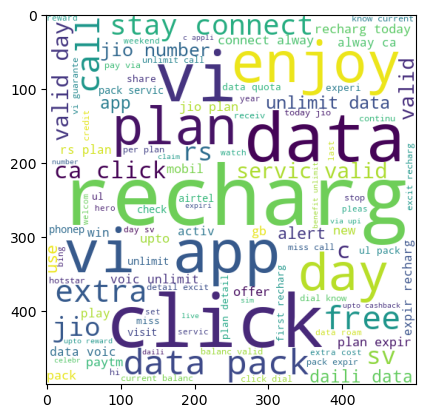

In [42]:
spam_wc = wc.generate(sh[sh['label']==1]['_body'].str.cat(sep=" "))
plt.imshow(spam_wc)

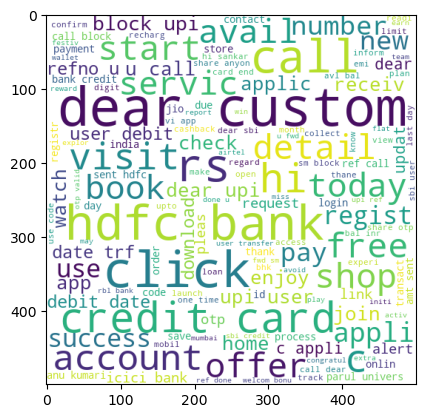

In [43]:
not_spam_wc = wc.generate(sh[sh['label']==0]['_body'].str.cat(sep=" "))
plt.imshow(not_spam_wc)

# model training

In [44]:
sh["_body"]

0                    complaint regist chitrakoot download
1       eo assign complaint fir jaswant kumar rajastha...
2       sankar rao mumbai idea base millet encompass e...
3       alert receiv unwant sm pleas complain call sen...
4       creditchangecrdaycrlmt join group learn latest...
                              ...                        
9762    countdown diwali begun max fashion shimmer shi...
9770    sorri could deliv order pc success click detai...
9778    offer wo stay long brighten diwali max fashion...
9800                                               surshd
9802                                             और और नव
Name: _body, Length: 4260, dtype: object

In [45]:
tf2 = TfidfVectorizer()

In [48]:
X = tf2.fit_transform(sh["_body"]).toarray()
y = sh["label"]

In [49]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [66]:
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

In [67]:
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9061032863849765
[[727  47]
 [ 33  45]]
0.4891304347826087


In [69]:
mb.fit(X_train, y_train)
y1_pred = mb.predict(X_test)
print(accuracy_score(y_test, y1_pred))
print(confusion_matrix(y_test, y1_pred))
print(precision_score(y_test, y1_pred))

0.9284037558685446
[[774   0]
 [ 61  17]]
1.0


In [70]:
bb.fit(X_train, y_train)
y_pred = bb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.937793427230047
[[765   9]
 [ 44  34]]
0.7906976744186046


In [71]:
# test of unknown

In [101]:
test_d = pd.DataFrame([["Jio free data recharg plan to stay connected, enjoy for 30 days."]])
test_d

,0
0,"Jio free data recharg plan to stay connected, ..."


In [102]:
test_d = test_d[0].apply(preprocessing)
test_d

0    jio free data recharg plan stay connect enjoy day
Name: 0, dtype: object

In [103]:
z = tf2.transform(test_d).toarray()
z

array([[0., 0., 0., ..., 0., 0., 0.]])

In [104]:
ans = mb.predict(z)
ans

array([1])

In [105]:
if ans == 0:
    print("not spam")
else:
    print("spam")

spam


In [95]:
sh[sh['label']==1]

,_body,label
11,miss superior indoor coverag airtel wifi call ...,1
71,person call avail receiv call click call back,1
93,dear jiofib user miss want back jiofib day fre...,1
155,miss call receiv unreach get detail miss call ...,1
226,miss call receiv number unreach get detail mis...,1
...,...,...
9267,plan give data unlimit voic call day recharg c,1
9292,worri daili data limit get data rollov airtel ...,1
9293,miss extra entertain airtel famili ott unlimit...,1
9404,jio plan expir recharg get unlimit voic call d...,1
